In [1]:
import pandas as pd

result = pd.read_csv("/tmp/result.csv")
result.head()

,EntryOrderId,EntryOrderKind,EntryOrderActiveUntil,EntryOrderActiveAfter,EntryOrderDirection,EntryOrderOCA,EntrySymbolId,EntryExecutionPrice,EntryExecutionDatetime,EntryExecutionQuantity,ExitOrderId,ExitOrderKind,ExitOrderActiveUntil,ExitOrderActiveAfter,ExitOrderDirection,ExitOrderOCA,ExitSymbolId,ExitExecutionPrice,ExitExecutionDatetime,ExitExecutionQuantity
0,657e0a99-f180-5a98-8eff-22619fcbd55f,MKT,None,None,LONG,None,eur/usd,1.11225,2016-06-01 00:01:00 UTC,0,549b61f0-6f28-5766-8b83-0000c64ee923,MKT,None,None,LONG,None,eur/usd,1.11220,2016-06-01 00:02:00 UTC,0
1,4db991b2-52c5-5a59-9c57-85a62395a360,MKT,None,None,LONG,None,eur/usd,1.11220,2016-06-01 00:02:00 UTC,0,ceeb7cd0-0fc9-5b5e-b6d6-bd8bdef06db7,MKT,None,None,LONG,None,eur/usd,1.11219,2016-06-01 00:03:00 UTC,0
2,6e179fb3-adc5-58da-b987-4f127272758e,MKT,None,None,LONG,None,eur/usd,1.11219,2016-06-01 00:03:00 UTC,0,9da9857b-049b-50b2-bb60-aeb2f1665183,MKT,None,None,LONG,None,eur/usd,1.11200,2016-06-01 00:04:00 UTC,0
3,8a5a7f1b-00ce-57d3-bc50-20c78167ba6d,MKT,None,None,LONG,None,eur/usd,1.11200,2016-06-01 00:04:00 UTC,0,6d4fb5ff-bde0-53d3-8177-fb745320155a,MKT,None,None,LONG,None,eur/usd,1.11206,2016-06-01 00:05:00 UTC,0
4,cc440d8b-c6a3-571c-94b9-db5cc99b3cd3,MKT,None,None,LONG,None,eur/usd,1.11206,2016-06-01 00:05:00 UTC,0,9222b582-034d-55f9-978f-82d7a692a2e5,MKT,None,None,LONG,None,eur/usd,1.11205,2016-06-01 00:06:00 UTC,0


In [49]:
returns = (result["ExitExecutionPrice"] - result["EntryExecutionPrice"]) / result["EntryExecutionPrice"]
#print(pd.to_datetime(result["EntryExecutionDatetime"], infer_datetime_format=True))
returns.index = pd.to_datetime(result["EntryExecutionDatetime"], infer_datetime_format=True)
returns.index = returns.index.tz_localize("UTC")
daily_returns = returns.resample("1D").sum().dropna()

Entire data start date: 2016-06-01
Entire data end date: 2016-11-30
Backtest months: 7


,Backtest
Annual return,-7.5%
Cumulative returns,-4.7%
Annual volatility,9.1%
Sharpe ratio,-0.81
Calmar ratio,-0.99
Stability,0.38
Max drawdown,-7.6%
Omega ratio,0.85
Sortino ratio,-1.00
Skew,-1.73


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,7.56,2016-06-08,2016-11-23,NaT,NaN
1,0.47,2016-06-01,2016-06-02,2016-06-03,3
2,0.12,2016-06-03,2016-06-05,2016-06-06,2
3,0.00,2016-06-01,2016-06-01,2016-06-01,1
4,0.00,2016-06-01,2016-06-01,2016-06-01,1


ValueError: Found input variables with inconsistent numbers of samples: [127, 156]

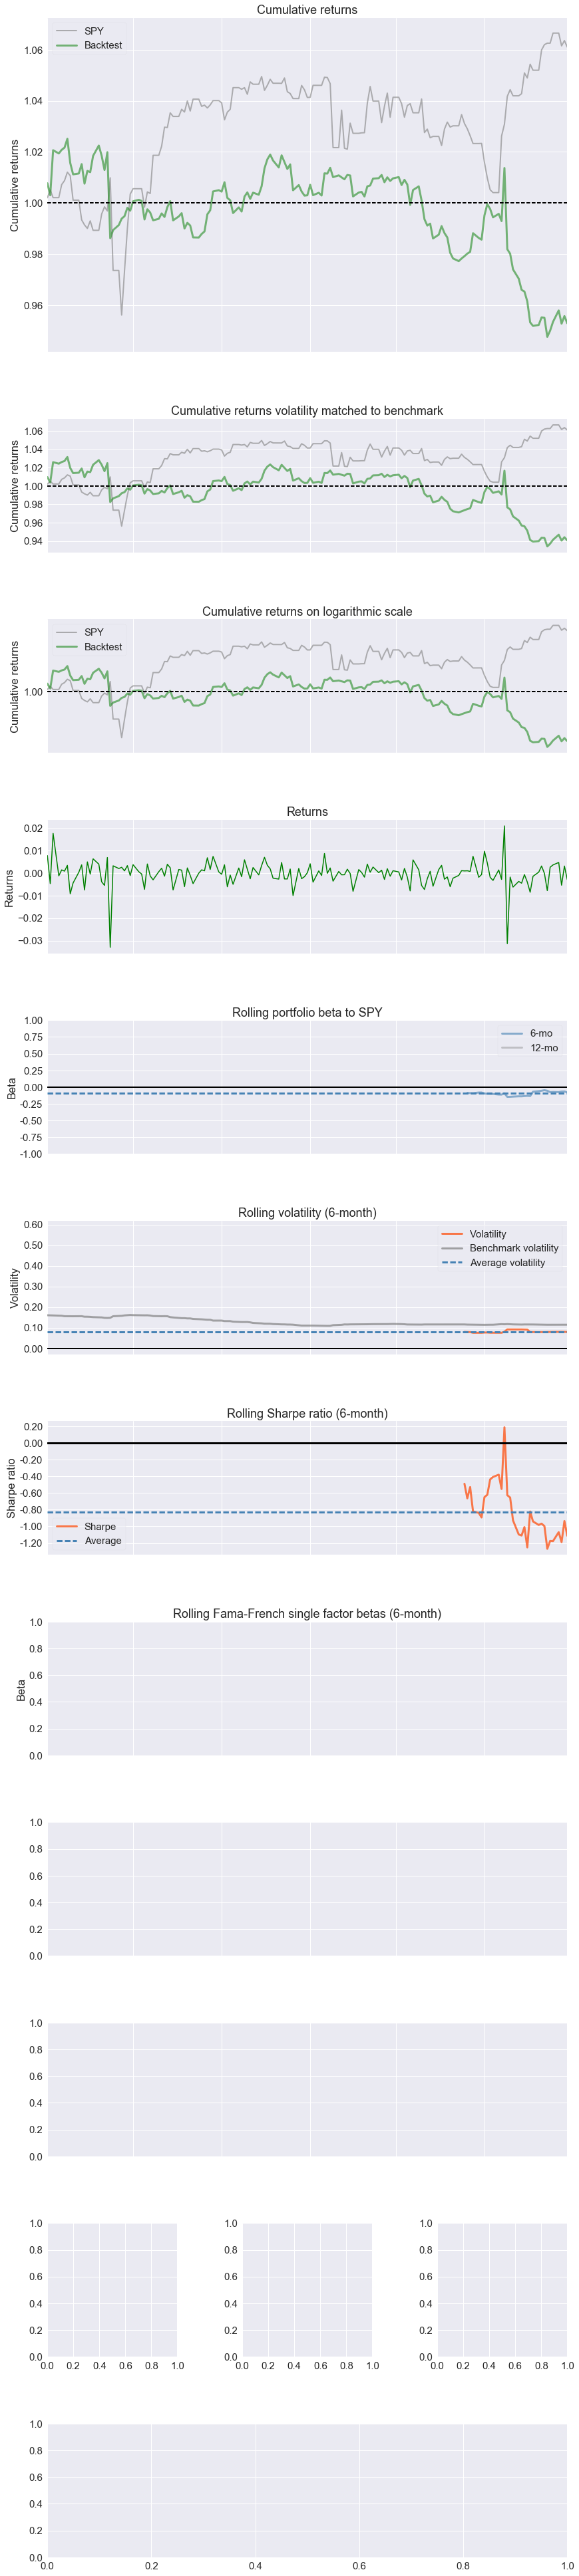

In [51]:
%matplotlib inline
from pyfolio.plotting import plot_returns
from pyfolio import create_full_tear_sheet
create_full_tear_sheet(daily_returns)